Assignment 8 problem statement: https://ovgu-ailab.github.io/idl2020w/ass8.html

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Number of GPUs Available:  1


4423680/4422102 [==============================] - 0s 0us/step
img_shape (28, 28)
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(28, 28)
(60000, 784)


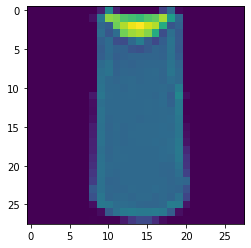

In [11]:
# Load fashion MNIST Data set.

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

img_shape = train_images[0].shape
print("img_shape",img_shape)

train_images_as_output = train_images.reshape([-1, 28 * 28]).astype(np.float32)
test_images_as_output = test_images.reshape([-1, 28 * 28]).astype(np.float32)

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(train_images[0].shape)
print(train_images_as_output.shape)
input_shape = train_images[0].shape

#show the first image.

plt.imshow(train_images[2])

In [37]:
print(train_images_as_output.shape)

(60000, 784)


In [15]:
def gen_autoencoder_MLP(inputshape,d_layers,l_activation,o_activation):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=inputshape))
  for units in d_layers:
    model.add(tf.keras.layers.Dense(units,l_activation))
  else:
    f_shape = 1
    for ele in inputshape:
      f_shape *= ele
    #print("f_shape: ",f_shape)
    model.add(tf.keras.layers.Dense(f_shape,o_activation))
  
  return model

model = gen_autoencoder_MLP(img_shape,[128,64,32,64,128],tf.nn.relu,tf.nn.sigmoid)
model.summary()
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=optimizer,loss=tf.keras.losses.binary_crossentropy,metrics='accuracy')

model.fit(x=train_images,y= train_images_as_output ,epochs=100, shuffle=True,batch_size=256)




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_29 (Dense)             (None, 784)              

In [16]:
def showimages(test_images,output_images,num_images):
  for idx in range(num_images):
    ax = plt.subplot(2, num_images, idx + 1)
    plt.imshow(test_images[idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction

    ax = plt.subplot(2, num_images , idx + 1 + num_images)
    plt.gray()
    plt.imshow(output_images[idx].reshape(28,28))
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    

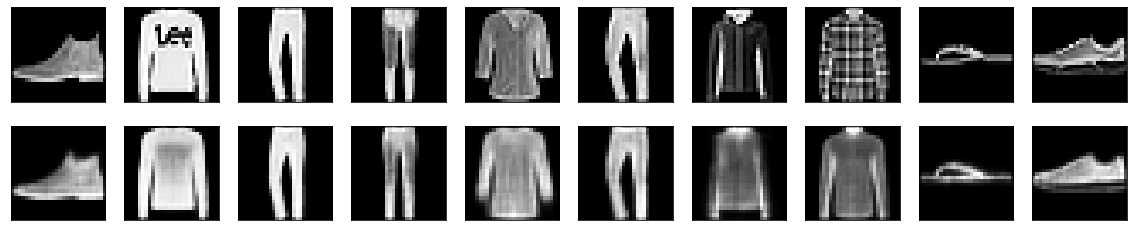

In [17]:
output_images = model.predict(test_images)
plt.figure(figsize=(20, 4))
showimages(test_images_as_output,output_images,10)
plt.show()

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))


model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()
model.fit(x=train_images,y= train_images ,epochs=100, shuffle=True,batch_size=256)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)          

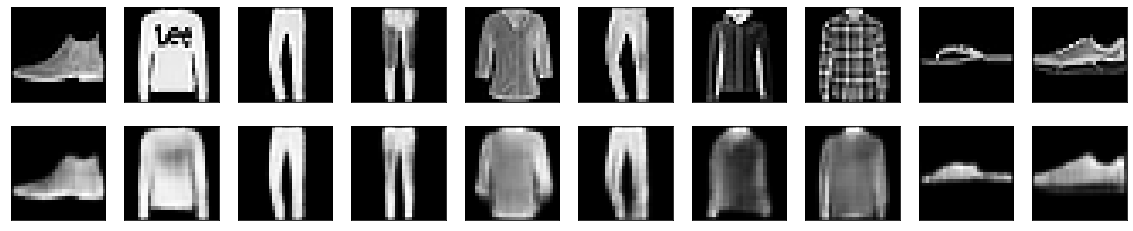

In [20]:
output_images = model.predict(test_images)
plt.figure(figsize=(20, 4))
showimages(test_images,output_images,10)
plt.show()

In [21]:
def unsupervisedpretraining(model,encoder_layer,freez_encoder = True,num_classes=10):
  if freez_encoder:
    for layer in model.layers[:encoder_layer + 1]:
      layer.trainable = False

  encoder = model.layers[encoder_layer].output
  flatten_e = tf.keras.layers.Flatten()(encoder)

  dense_layer1 = tf.keras.layers.Dense(128, activation='relu')(flatten_e)
  dense_layer2 = tf.keras.layers.Dense(64, activation='relu')(dense_layer1)

  output = tf.keras.layers.Dense(10, activation='softmax')(dense_layer2)
  model = tf.keras.models.Model(inputs=model.inputs, outputs=output)

  return model


unsp_model = unsupervisedpretraining(model,5)
unsp_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [33]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from sklearn.model_selection import train_test_split
X, X_sample, X_labels, X_sample_labels = train_test_split(train_images,train_labels,stratify=train_labels,test_size=0.1)
unsp_model.compile(optimizer='Adam', loss='binary_crossentropy',metrics='accuracy')

from keras.utils import np_utils
num_classes = 10
X_sample_labels = np_utils.to_categorical(X_sample_labels, num_classes)
unsp_model.fit(X_sample, X_sample_labels, epochs=50, batch_size=128, shuffle=True)

Epoch 1/50
47/47 [==============================] - 1s 3ms/step - loss: 0.0823 - accuracy: 0.8370
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.8630
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.8426
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.8538
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.8524
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.8460
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.8652
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 0.8569
Epoch 9/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.8678
Epoch 10/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.8604
Epoch 11/50
47/47 [

In [34]:
test_labels_c = np_utils.to_categorical(test_labels, num_classes)
unsp_model.evaluate(test_images, test_labels_c, verbose=2)

313/313 - 1s - loss: 0.0723 - accuracy: 0.8523


[0.07229739427566528, 0.8522999882698059]

In [29]:
unsp_model_2 = unsupervisedpretraining(model,5,freez_encoder=False)
unsp_model_2.compile(optimizer='Adam', loss='binary_crossentropy',metrics='accuracy')
unsp_model_2.fit(X_sample, X_sample_labels, epochs=50, batch_size=128, shuffle=True)

Epoch 1/50
47/47 [==============================] - 1s 3ms/step - loss: 0.3703 - accuracy: 0.2256
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.6196
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.6762
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.7080
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 0.7159
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.7456
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.7520
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.7604
Epoch 9/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1106 - accuracy: 0.7770
Epoch 10/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.7764
Epoch 11/50
47/47 [

In [36]:
#test_labels_c = np_utils.to_categorical(test_labels, num_classes)
unsp_model_2.evaluate(test_images, test_labels_c, verbose=2)

313/313 - 1s - loss: 0.0827 - accuracy: 0.8281


[0.08274810761213303, 0.8281000256538391]